In [2]:
import sys
sys.path.append('C:/Users/dell/Desktop/Colorizer_rapsody/DeOldify')


In [3]:
# DeOldify - Image Colorization

import torch
from deoldify.visualize import get_image_colorizer
import matplotlib.pyplot as plt
from PIL import Image
import os

NumExpr defaulting to 16 threads.


In [4]:
from pathlib import Path

# Convert your root folder to a Path object
root_folder = Path(r'C:\Users\dell\Desktop\Colorizer_rapsody\DeOldify')



In [5]:
# Check if GPU is available
if not torch.cuda.is_available():
    print("CUDA is not available. Make sure your GPU is set up properly.")
else:
    print("CUDA is available. Using GPU for inference.")

CUDA is available. Using GPU for inference.


Loading ColorizeStable_gen model...
Original Image:


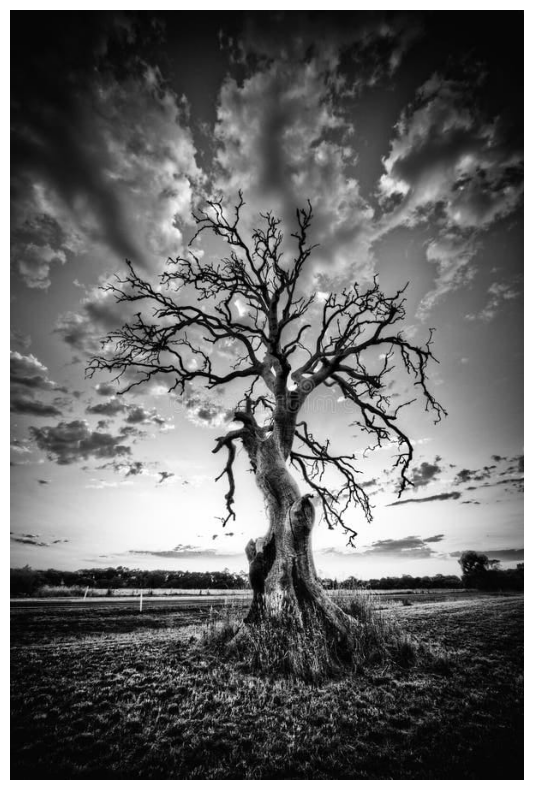

Colorizing image... Please wait.


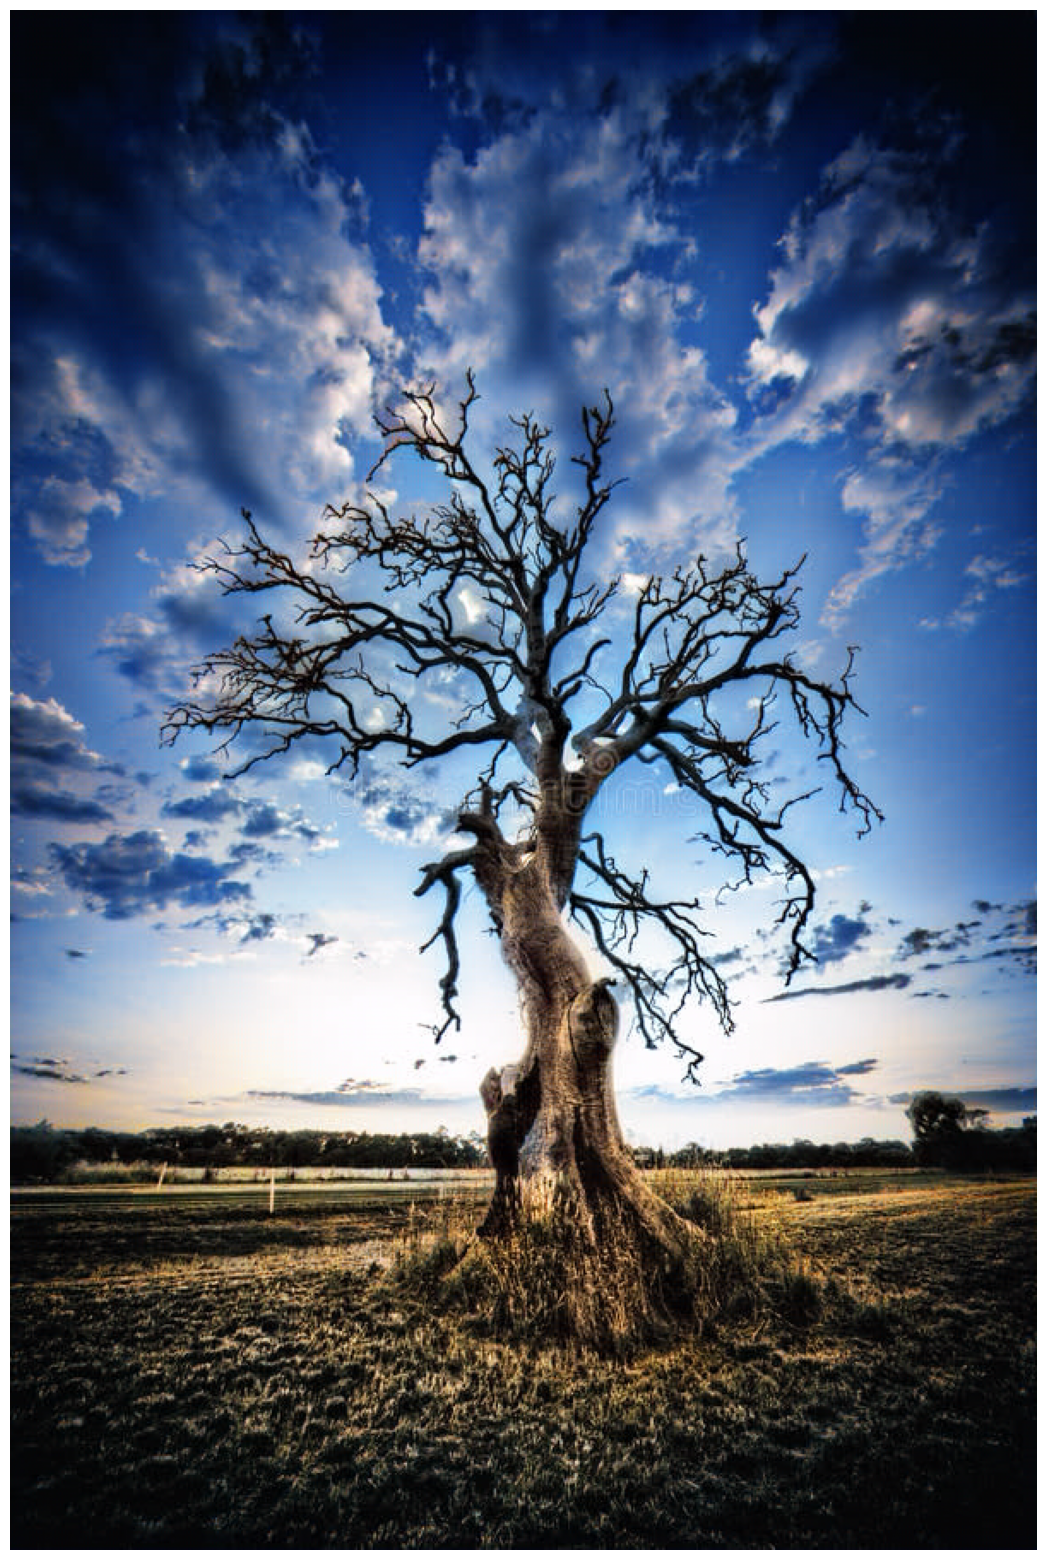

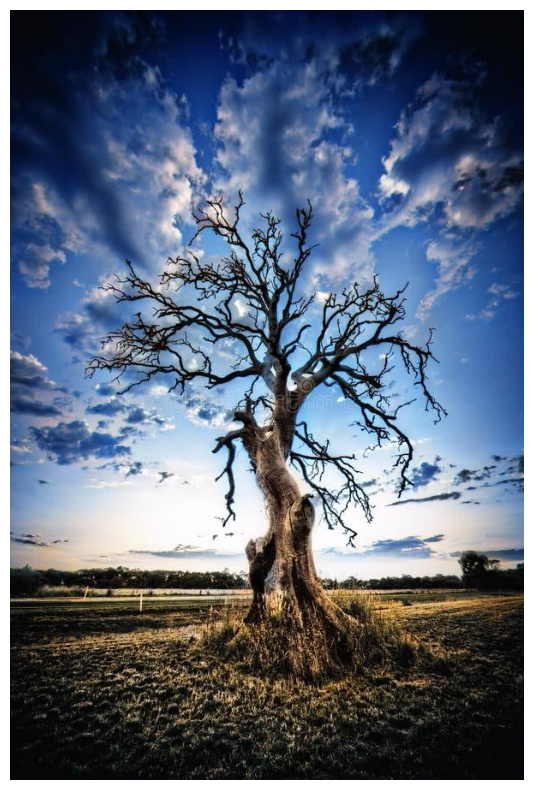

Image saved at stable\tree.jpg


In [70]:
def display_image(image_path):
    """
    Display an image using matplotlib.
    """
    img = Image.open(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()


# Load the DeOldify Colorizer using the ColorizeStable_gen.pth model
print('Loading ColorizeStable_gen model...')
colorizer = get_image_colorizer(root_folder=root_folder, artistic=False)

# Define the image path (Place your black & white image in the 'images' folder)
image_path = r'C:\Users\dell\Desktop\Colorizer_rapsody\tree.jpg'

# Display the original image
print("Original Image:")
display_image(image_path)

# Perform Image Colorization
print("Colorizing image... Please wait.")

# Define results directory as a Path object and make the stable directory
results_dir = Path('./stable')
results_dir.mkdir(parents=True, exist_ok=True)

# Colorize the image and save it to disk
result_path = colorizer.plot_transformed_image(path=image_path, results_dir=results_dir, render_factor=35)

# Display the Colorized Image
display_image(result_path)

# Save the Colorized Image with the same name as the original image
output_path = results_dir / Path(image_path).name
os.rename(result_path, output_path)
print(f"Image saved at {output_path}")